# Assignment 3 - Building a Custom Visualization

---

In this assignment you must choose one of the options presented below and submit a visual as well as your source code for peer grading. The details of how you solve the assignment are up to you, although your assignment must use matplotlib so that your peers can evaluate your work. The options differ in challenge level, but there are no grades associated with the challenge level you chose. However, your peers will be asked to ensure you at least met a minimum quality for a given technique in order to pass. Implement the technique fully (or exceed it!) and you should be able to earn full grades for the assignment.


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Ferreira, N., Fisher, D., & Konig, A. C. (2014, April). [Sample-oriented task-driven visualizations: allowing users to make better, more confident decisions.](https://www.microsoft.com/en-us/research/wp-content/uploads/2016/02/Ferreira_Fisher_Sample_Oriented_Tasks.pdf) 
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;In Proceedings of the SIGCHI Conference on Human Factors in Computing Systems (pp. 571-580). ACM. ([video](https://www.youtube.com/watch?v=BI7GAs-va-Q))


In this [paper](https://www.microsoft.com/en-us/research/wp-content/uploads/2016/02/Ferreira_Fisher_Sample_Oriented_Tasks.pdf) the authors describe the challenges users face when trying to make judgements about probabilistic data generated through samples. As an example, they look at a bar chart of four years of data (replicated below in Figure 1). Each year has a y-axis value, which is derived from a sample of a larger dataset. For instance, the first value might be the number votes in a given district or riding for 1992, with the average being around 33,000. On top of this is plotted the 95% confidence interval for the mean (see the boxplot lectures for more information, and the yerr parameter of barcharts).

<br>
<img src="readonly/Assignment3Fig1.png" alt="Figure 1" style="width: 400px;"/>
<h4 style="text-align: center;" markdown="1">  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Figure 1 from (Ferreira et al, 2014).</h4>

<br>

A challenge that users face is that, for a given y-axis value (e.g. 42,000), it is difficult to know which x-axis values are most likely to be representative, because the confidence levels overlap and their distributions are different (the lengths of the confidence interval bars are unequal). One of the solutions the authors propose for this problem (Figure 2c) is to allow users to indicate the y-axis value of interest (e.g. 42,000) and then draw a horizontal line and color bars based on this value. So bars might be colored red if they are definitely above this value (given the confidence interval), blue if they are definitely below this value, or white if they contain this value.


<br>
<img src="readonly/Assignment3Fig2c.png" alt="Figure 1" style="width: 400px;"/>
<h4 style="text-align: center;" markdown="1">  Figure 2c from (Ferreira et al. 2014). Note that the colorbar legend at the bottom as well as the arrows are not required in the assignment descriptions below.</h4>

<br>
<br>

**Easiest option:** Implement the bar coloring as described above - a color scale with only three colors, (e.g. blue, white, and red). Assume the user provides the y axis value of interest as a parameter or variable.


**Harder option:** Implement the bar coloring as described in the paper, where the color of the bar is actually based on the amount of data covered (e.g. a gradient ranging from dark blue for the distribution being certainly below this y-axis, to white if the value is certainly contained, to dark red if the value is certainly not contained as the distribution is above the axis).

**Even Harder option:** Add interactivity to the above, which allows the user to click on the y axis to set the value of interest. The bar colors should change with respect to what value the user has selected.

**Hardest option:** Allow the user to interactively set a range of y values they are interested in, and recolor based on this (e.g. a y-axis band, see the paper for more details).

---

*Note: The data given for this assignment is not the same as the data used in the article and as a result the visualizations may look a little different.*

In [1]:
# Use the following data for this assignment:

import pandas as pd
import numpy as np

np.random.seed(12345)

df = pd.DataFrame([np.random.normal(32000,200000,3650), 
                   np.random.normal(43000,100000,3650), 
                   np.random.normal(43500,140000,3650), 
                   np.random.normal(48000,70000,3650)], 
                  index=[1992,1993,1994,1995])
df

,0,1,2,3,4,5,6,7,8,9,...,3640,3641,3642,3643,3644,3645,3646,3647,3648,3649
1992,-8941.531897,127788.667612,-71887.743011,-79146.060869,425156.114501,310681.166595,50581.575349,88349.230566,185804.513522,281286.947277,...,171938.760289,150650.759924,203663.976475,-377877.158072,-197214.093861,24185.008589,-56826.729535,-67319.766489,113377.299342,-4494.878538
1993,-51896.094813,198350.518755,-123518.252821,-129916.759685,216119.147314,49845.883728,149135.648505,62807.672113,23365.577348,-109686.264981,...,-44566.520071,101032.122475,117648.199945,160475.622607,-13759.888342,-37333.493572,103019.841174,179746.127403,13455.493990,34442.898855
1994,152336.932066,192947.128056,389950.263156,-93006.152024,100818.575896,5529.230706,-32989.370488,223942.967178,-66721.580898,47826.269111,...,165085.806360,74735.174090,107329.726875,199250.734156,-36792.202754,-71861.846997,26375.113219,-29328.078384,65858.761714,-91542.001049
1995,-69708.439062,-13289.977022,-30178.390991,55052.181256,152883.621657,12930.835194,63700.461932,64148.489835,-29316.268556,59645.677367,...,-13901.388118,50173.686673,53965.990717,4128.990173,72202.595138,39937.199964,139472.114293,59386.186379,73362.229590,28705.082908


In [10]:
%matplotlib notebook

import matplotlib.pyplot as plt
import matplotlib as mpl
import scipy.stats as st

In [3]:
data[1992]
df.loc[1992]
df.shape[1]

NameError: name 'data' is not defined

<IPython.core.display.Javascript object>


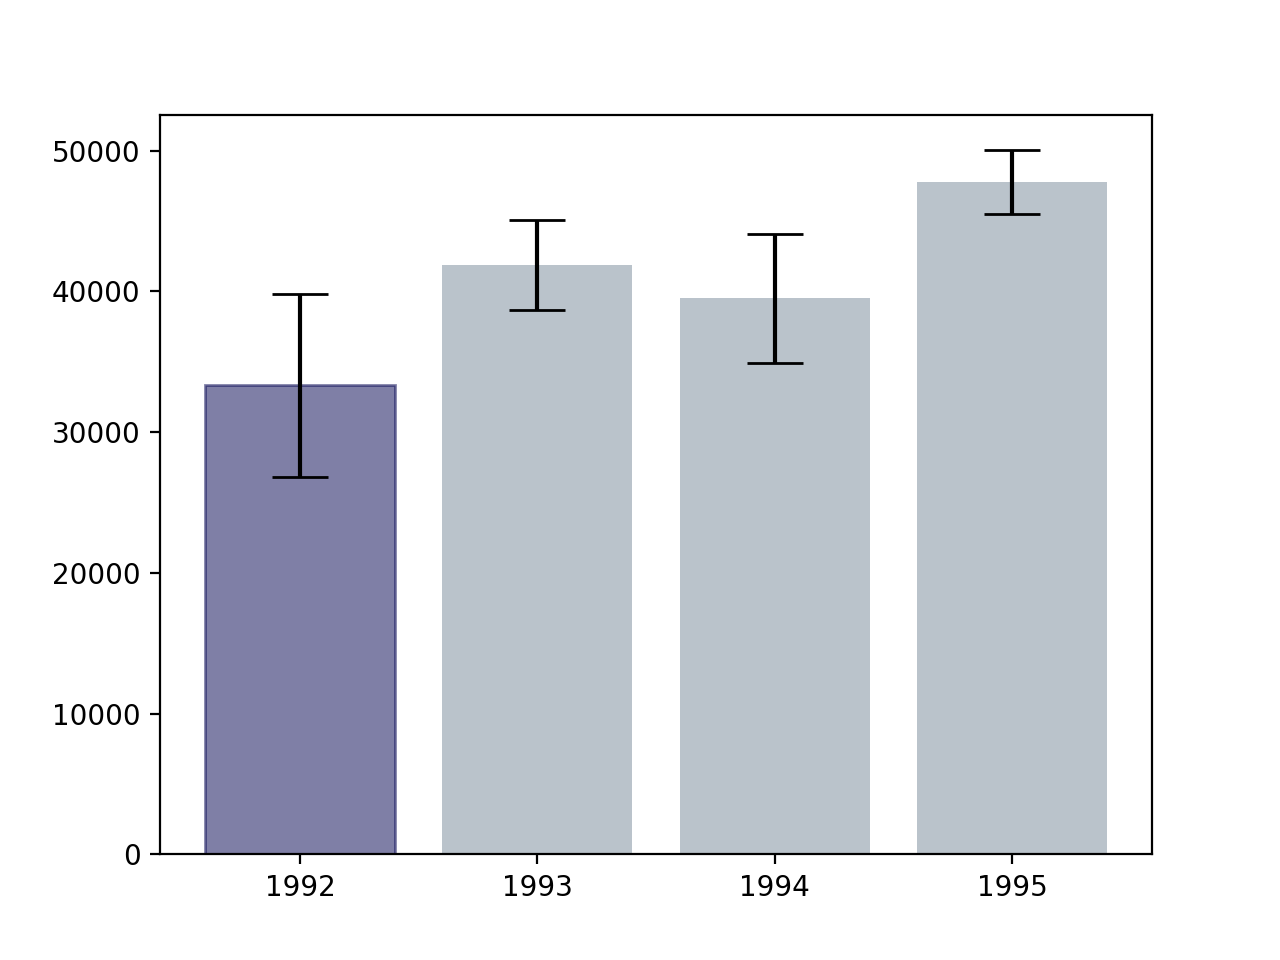

([<matplotlib.axis.XTick at 0x1a23e89fd0>,
 <a list of 4 Text xticklabel objects>)

In [11]:
mean = df.mean(axis = 1)
std = df.std(axis = 1)

n = df.shape[1]
yerr = std / np.sqrt(n) * st.t.ppf(1-0.05/2, n-1) # st.t.ppf for the z*-value of different confidence level

bars = plt.bar(list(df.index), mean, align='center', width=0.8, yerr=yerr, capsize=10, alpha=0.5, color = 'lightslategrey') 
plt.xticks(np.arange(1992, 1996, 1))

In [12]:
# A new appraoch, try to add color based on the scale
cm = plt.cm.get_cmap('seismic')
#bars[0].set_color(cm(1))

norm = mpl.colors.Normalize(vmin=0,vmax=2)
sm = plt.cm.ScalarMappable(cmap=cm, norm=norm)
sm.set_array([])
plt.colorbar(cm.ScalarMappable(norm=norm, cmap=cm), ax=ax)

AttributeError: 'LinearSegmentedColormap' object has no attribute 'ScalarMappable'

In [5]:
bars[1]
bars = plt.bar(list(df.index), mean, align='center', width=0.8, yerr=yerr, capsize=10, alpha=0.5, color = 'lightslategrey') 
plt.xticks(np.arange(1992, 1996, 1))

([<matplotlib.axis.XTick at 0x1a23480210>,
 <a list of 4 Text xticklabel objects>)

In [6]:
inrange = pd.DataFrame([yerr/2 + mean, mean - yerr/2, mean], index = ['Max', 'Min', 'Mean']).T
inrange['Number'] = [0, 1, 2, 3]
inrange

,Max,Min,Mean,Number
1992,36567.576485,30056.638467,33312.107476,0
1993,43458.486963,40265.232119,41861.859541,1
1994,41770.969737,37215.640146,39493.304941,2
1995,48875.831615,46611.270324,47743.550969,3


In [7]:
len(higher)

NameError: name 'higher' is not defined

In [8]:
# plot a horizontal line

value = 40000
plt.axhline(y=value, color='purple')


# change the color based on the value 
lower = inrange[inrange['Max']<value]
higher = inrange[inrange['Min']>value]
init = inrange[(inrange['Min']<value) & (inrange['Max']>value)]

x1 = len(lower)
x2 = len(higher)
x3 = len(init)

for n in range(x1):
    bars[int(lower.iloc[n]['Number'])].set_color('r')
        
for n in range(x2):
    bars[int(higher.iloc[n]['Number'])].set_color('blue')
    
for n in range(x3):
    bars[int(init.iloc[n]['Number'])].set_color('green')


In [222]:
x1 = 0
for n in range(x1):
    print(n)

In [149]:
# plot a horizontal line

value = 40000
plt.axhline(y=value, color='purple')

In [ ]:
# try the interactivity

In [85]:
yerr
#yerr1992 = st.t.interval(0.95, len(df.loc[1992])-1, loc=data[1992], scale(st.sem(df.loc[1992])))

SyntaxError: positional argument follows keyword argument (<ipython-input-85-307197a15be1>, line 2)

In [10]:
plot_mean = df.mean(axis = 1)

In [43]:
plot_mean

1992    33312.107476
1993    41861.859541
1994    39493.304941
1995    47743.550969
dtype: float64

In [38]:
list(df.index)

[1992, 1993, 1994, 1995]

神奇笔记…… numpy和dataframe中的std计算方法是不一样的

In [49]:
df.std(axis=1, skipna=True, ddof=0) # set ddof=0 or it would be different 

1992    200603.415985
1993     98384.876053
1994    140350.695166
1995     69771.625748
dtype: float64

In [56]:
np.std(df.T)

1992    200603.415985
1993     98384.876053
1994    140350.695166
1995     69771.625748
dtype: float64

In [62]:
yerr = [np.std(df[1992]), np.std(df[1993]), np.std(df[1994]), np.std(df[1995])]

In [61]:
np.std(df[1992])

85795.57877097867

### New solution! -Final version

<IPython.core.display.Javascript object>


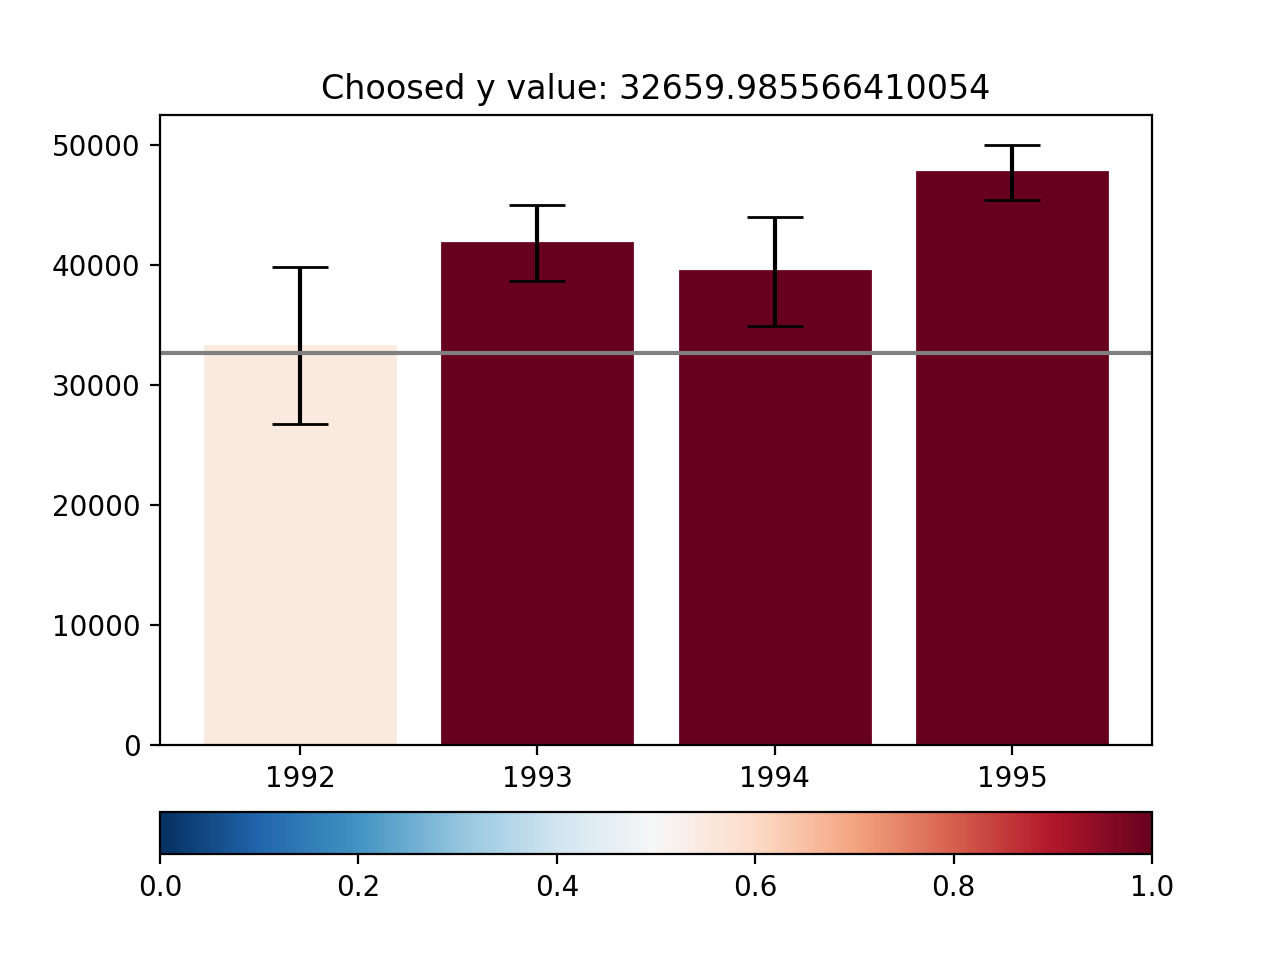

7

In [126]:
%matplotlib notebook

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm
import scipy.stats as st

# deal with data

np.random.seed(12345)

df = pd.DataFrame([np.random.normal(32000,200000,3650), 
                   np.random.normal(43000,100000,3650), 
                   np.random.normal(43500,140000,3650), 
                   np.random.normal(48000,70000,3650)], 
                  index=[1992,1993,1994,1995])

# set the colorbar as a subplot with bar chart
fig,(ax1,ax2) = plt.subplots(nrows=2, ncols=1, gridspec_kw={'height_ratios':[15,1]})
norm = mpl.colors.Normalize(vmin=0, vmax=1)
mpl.colorbar.ColorbarBase(ax2, cmap=cm.RdBu_r, norm=norm, orientation='horizontal')
colors=cm.RdBu_r

# plot the basic bar chart
mean = df.mean(axis = 1)
std = df.std(axis = 1)

n = df.shape[1]
yerr = std / np.sqrt(n) * st.t.ppf(1-0.05/2, n-1) # st.t.ppf for the z*-value of different confidence level


bars = ax1.bar(list(df.index), mean, align='center', width=0.8, yerr=yerr, capsize=10, color = 'lightslategrey') 
ax1.set_xticks(np.arange(1992, 1996, 1))

ax1.set_title('Click to create a new line')


# add interactivity

global ploty
def onclick(event):
    ploty = event.ydata
    
    ax1.cla()
    ax1.axhline(y=ploty, color='grey')
    ax1.set_title('Choosed y value: {}'.format(event.ydata))

    bars = ax1.bar(list(df.index), mean, align='center', width=0.8, yerr=yerr, capsize=10, color = 'lightslategrey') 
    ax1.set_xticks(np.arange(1992, 1996, 1))

    #calculate the color value (range 0-1) for each year

    inrange = pd.DataFrame([yerr + mean, mean - yerr, mean, yerr*2], index = ['Max', 'Min', 'Mean', 'yerr']).T

    inrange['Diff'] = inrange['Max'] - ploty
    inrange['Setcolor'] = inrange['Diff']/inrange['yerr']

    # set the color for each year
    bar_color = [colors(x) for x in inrange['Setcolor']]

    for n in range(4):
        bars[n].set_color(bar_color[n])
    
# tell mpl_connect we want to pass a 'button_press_event' into onclick when the event is detected
fig.canvas.mpl_connect('button_press_event', onclick) # fig is the current figure, same to plt.gcf()



-------------------------

In [ ]:
# add interactivity

global ploty
def onclick(event):
    ploty = event.ydata
    
    ax1.cla()
    ax1.axhline(y=ploty, color='grey')
    ax1.set_title('Choosed y value: {}'.format(event.ydata))

    bars = ax1.bar(list(df.index), mean, align='center', width=0.8, yerr=yerr, capsize=10, color = 'lightslategrey') 
    ax1.set_xticks(np.arange(1992, 1996, 1))

    #calculate the color value (range 0-1) for each year

    inrange = pd.DataFrame([yerr + mean, mean - yerr, mean, yerr*2], index = ['Max', 'Min', 'Mean', 'yerr']).T

    inrange['Diff'] = inrange['Max'] - ploty
    inrange['Setcolor'] = inrange['Diff']/inrange['yerr']

    # set the color for each year
    bar_color = [colors(x) for x in inrange['Setcolor']]

    for n in range(4):
        bars[n].set_color(bar_color[n])
    
# tell mpl_connect we want to pass a 'button_press_event' into onclick when the event is detected
fig.canvas.mpl_connect('button_press_event', onclick) # fig is the current figure, same to plt.gcf()




### Some Try 

In [115]:
# plot the basic bar chart
mean = df.mean(axis = 1)
std = df.std(axis = 1)

n = df.shape[1]
yerr = std / np.sqrt(n) * st.t.ppf(1-0.05/2, n-1) # st.t.ppf for the z*-value of different confidence level

# input y value
y_value = 44000
ax1.cla()
ax1.axhline(y=y_value, color='grey')

bars = ax1.bar(list(df.index), mean, align='center', width=0.8, yerr=yerr, capsize=10, color = 'lightslategrey') 
ax1.set_xticks(np.arange(1992, 1996, 1))

#calculate the color value (range 0-1) for each year

inrange = pd.DataFrame([yerr + mean, mean - yerr, mean, yerr*2], index = ['Max', 'Min', 'Mean', 'yerr']).T

inrange['Diff'] = inrange['Max'] - y_value
inrange['Setcolor'] = inrange['Diff']/inrange['yerr']

# set the color for each year
bar_color = [colors(x) for x in inrange['Setcolor']]

for n in range(4):
    bars[n].set_color(bar_color[n])
    
ax1.set_title('Click to create a new line')


Text(0.5, 1.0, 'Click to create a new line')

In [122]:
# add interactivity

global ploty
def onclick(event):
    ploty = event.ydata
    
    ax1.cla()
    ax1.axhline(y=ploty, color='grey')
    ax1.set_title('Choosed y value: {}'.format(event.ydata))

    bars = ax1.bar(list(df.index), mean, align='center', width=0.8, yerr=yerr, capsize=10, color = 'lightslategrey') 
    ax1.set_xticks(np.arange(1992, 1996, 1))

    #calculate the color value (range 0-1) for each year

    inrange = pd.DataFrame([yerr + mean, mean - yerr, mean, yerr*2], index = ['Max', 'Min', 'Mean', 'yerr']).T

    inrange['Diff'] = inrange['Max'] - ploty
    inrange['Setcolor'] = inrange['Diff']/inrange['yerr']

    # set the color for each year
    bar_color = [colors(x) for x in inrange['Setcolor']]

    for n in range(4):
        bars[n].set_color(bar_color[n])
    
# tell mpl_connect we want to pass a 'button_press_event' into onclick when the event is detected
fig.canvas.mpl_connect('button_press_event', onclick) # fig is the current figure, same to plt.gcf()



16

In [72]:
for x in inrange['Setcolor']:
    print(x)
    print(colors(x))

0.0
(0.0196078431372549, 0.18823529411764706, 0.3803921568627451, 1.0)
1.0
(0.403921568627451, 0.0, 0.12156862745098039, 1.0)
0.3887687381533882
(0.7905420991926182, 0.8832756632064591, 0.9328719723183391, 1.0)
1.0
(0.403921568627451, 0.0, 0.12156862745098039, 1.0)


In [79]:
bars[0].set_color(bar_color[0])

In [77]:
colors(0)

(0.0196078431372549, 0.18823529411764706, 0.3803921568627451, 1.0)